In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from patsy import dmatrices
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV,ElasticNet,enet_path
from sklearn.datasets import make_regression
from redcap import Project

In [2]:
# # Import data from REDCap
# api_url = 'https://redcap.ucdenver.edu/api/'
# api_key = ''
# project = Project(api_url, api_key)
# data = project.export_records(forms=['parent_demographics'])

In [3]:
# Import data
df = pd.read_csv('/Users/timvigers/Desktop/177844RenalBloodFlow_DATA_2021-12-14_1401.csv')
# Predictors
r_rbf_avg = df[['r_rbf_avg_sr','r_rbf_avg_sup_sr','r_rbf_avg_inf_sr','r_rbf_avg_3b_sr']].sum(axis=1)
r_rbf_avg[r_rbf_avg == 0] = np.nan
r_rbf_avg_vein = df[['r_rbf_avg_vein_sr','r_rbf_avg_vein_sup_sr','r_rbf_avg_vein_inf_sr']].sum(axis=1)
r_rbf_avg_vein[r_rbf_avg_vein == 0] = np.nan
l_rbf_avg = df[['l_rbf_avg_sr','l_rbf_avg_sup_sr','l_rbf_avg_inf_sr','l_rbf_avg_3b_sr']].sum(axis=1)
l_rbf_avg[l_rbf_avg == 0] = np.nan
l_rbf_avg_vein = df[['l_rbf_avg_vein_sr','l_rbf_avg_vein_sup_sr','l_rbf_avg_vein_inf_sr']].sum(axis=1)
l_rbf_avg_vein[l_rbf_avg_vein == 0] = np.nan
r_rbf_peak = df[['r_rbf_peak_sr','r_rbf_peak_sup_sr','r_rbf_peak_inf_sr','r_rbf_peak_3b_sr']].sum(axis=1)
r_rbf_peak[r_rbf_peak == 0] = np.nan
r_rbf_peak_vein = df[['r_rbf_peak_vein_sr','r_rbf_peak_vein_sup_sr','r_rbf_peak_vein_inf_sr']].sum(axis=1)
r_rbf_peak_vein[r_rbf_peak_vein == 0] = np.nan
l_rbf_peak = df[['l_rbf_peak_sr','l_rbf_peak_sup_sr','l_rbf_peak_inf_sr','l_rbf_peak_3b_sr']].sum(axis=1)
l_rbf_peak[l_rbf_peak == 0] = np.nan
l_rbf_peak_vein = df[['l_rbf_peak_vein_sr','l_rbf_peak_vein_sup_sr','l_rbf_peak_vein_inf_sr']].sum(axis=1)
l_rbf_peak_vein[l_rbf_peak_vein == 0] = np.nan
r_rbv_peak = df[['r_rbv_peak_sr','r_rbv_peak_sup_sr','r_rbv_peak_inf_sr','r_rbv_peak_3b_sr']].sum(axis=1)
r_rbv_peak[r_rbv_peak == 0] = np.nan
r_rbv_peak_vein = df[['r_rbv_peak_vein_sr','r_rbv_peak_vein_sup_sr','r_rbv_peak_vein_inf_sr']].sum(axis=1)
r_rbv_peak_vein[r_rbv_peak_vein == 0] = np.nan
l_rbv_peak = df[['l_rbv_peak_sr','l_rbv_peak_sup_sr','l_rbv_peak_inf_sr','l_rbv_peak_3b_sr']].sum(axis=1)
l_rbv_peak[l_rbv_peak == 0] = np.nan
l_rbv_peak_vein = df[['l_rbv_peak_vein_sr','l_rbv_peak_vein_sup_sr','l_rbv_peak_vein_inf_sr']].sum(axis=1)
l_rbv_peak_vein[l_rbv_peak_vein == 0] = np.nan
# eGFR
eGFR_schwartz = round(0.413*(df.ht/df.screat),2)
# Put together
calculated = {'r_rbf_avg':r_rbf_avg,'r_rbf_avg_vein':r_rbf_avg_vein,'l_rbf_avg':l_rbf_avg,
              'l_rbf_avg_vein':l_rbf_avg_vein,'r_rbf_peak':r_rbf_peak,'r_rbf_peak_vein':r_rbf_peak_vein,
             'l_rbf_peak':l_rbf_peak,'l_rbf_peak_vein':l_rbf_peak_vein,'r_rbv_peak':r_rbv_peak,
              'r_rbv_peak_vein':r_rbv_peak_vein,'l_rbv_peak':l_rbv_peak,'l_rbv_peak_vein':l_rbv_peak_vein,
             'eGFR_schwartz':eGFR_schwartz}
calc_df = pd.concat(calculated,axis=1)
# Add other columns
final_df = pd.concat([df[['record_id','hr_mri_sr','hr_mri_rv_sr','hr_mri_la_sr','hr_mri_lv_sr',
                         'a1_peak_flow_sr','a1_max_vel_sr','a1_avg_vol_sr','a2_peak_flow_sr','a2_max_vel_sr','a2_avg_flow_sr']],calc_df,
               df[['igfr','igfr_ab']]],axis=1)
# Averages
final_df['rbf_avg'] = final_df[['r_rbf_avg','l_rbf_avg']].mean(axis=1)
final_df['rbf_avg_vein'] = final_df[['r_rbf_avg_vein','l_rbf_avg_vein']].mean(axis=1)
final_df['rbf_peak'] = final_df[['r_rbf_peak','l_rbf_peak']].mean(axis=1)
final_df['rbf_peak_vein'] = final_df[['r_rbf_peak_vein','l_rbf_peak_vein']].mean(axis=1)
final_df['rbv_peak'] = final_df[['r_rbv_peak','l_rbv_peak']].mean(axis=1)
final_df['rbv_peak_vein'] = final_df[['r_rbv_peak_vein','l_rbv_peak_vein']].mean(axis=1)
final_df.drop(columns = ['r_rbf_avg','l_rbf_avg','r_rbf_avg_vein','l_rbf_avg_vein',
                         'r_rbf_peak','l_rbf_peak','r_rbf_peak_vein','l_rbf_peak_vein',
                         'r_rbv_peak','l_rbv_peak','r_rbv_peak_vein','l_rbv_peak_vein'],inplace=True)
# List y and X variables
outcomes = ['igfr','igfr_ab','eGFR_schwartz']
pred = [c for c in final_df.columns if c not in outcomes]
# Write cleaned data
final_df.to_csv('/Volumes/PEDS/RI Biostatistics Core/Shared/Shared Projects/Laura/Peds Endo/Petter Bjornstad/Renal Imaging/Data_Clean/analysis_dataset.csv',index=False)

# IGFR

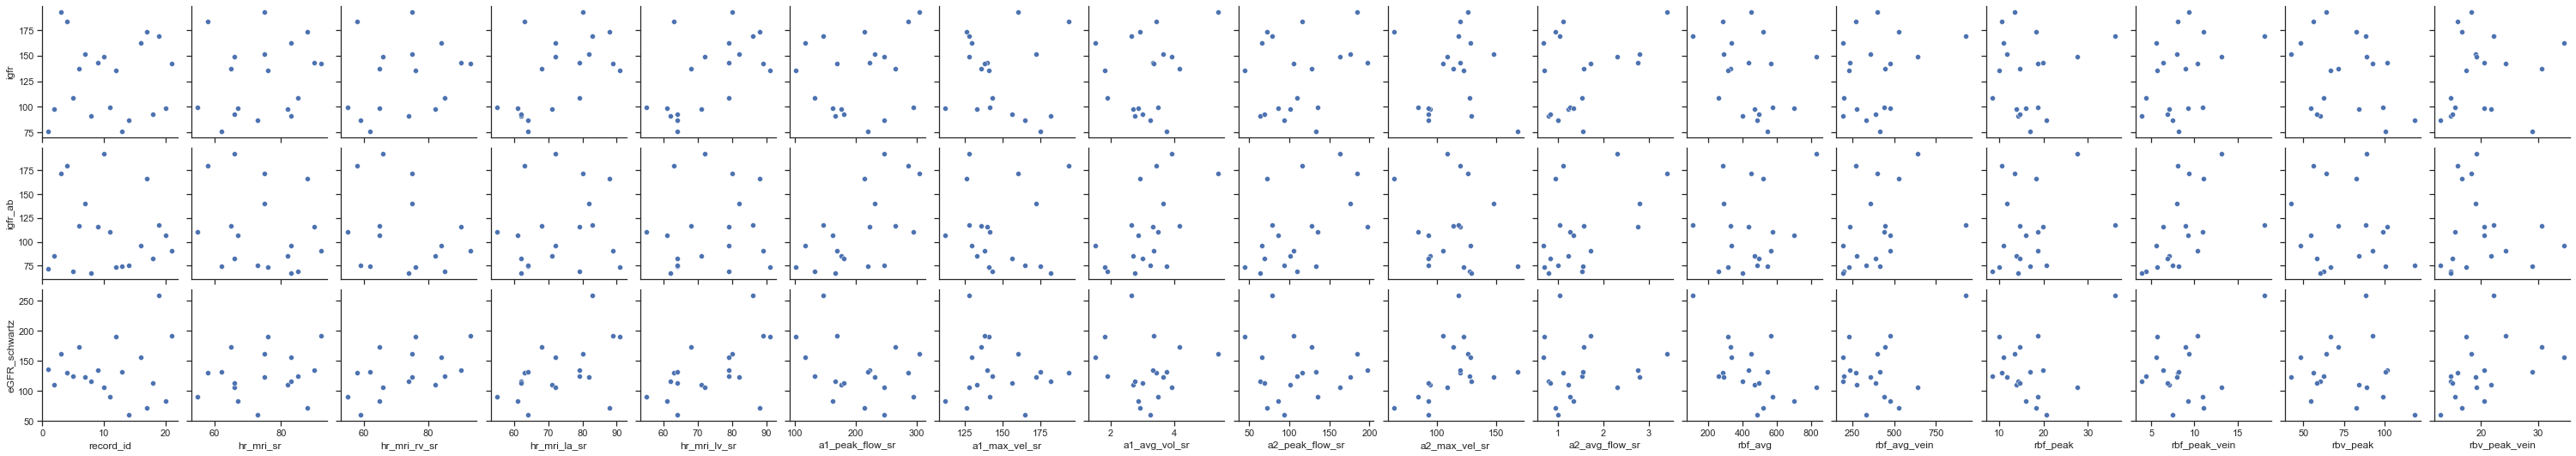

In [4]:
sns.set_theme(style="ticks")
sns.pairplot(final_df,y_vars=outcomes,x_vars=pred);

## ElasticNet

In [5]:
# Model matrices
y,X = dmatrices('igfr~'+'+'.join(pred),data=final_df,return_type="dataframe")
# Scale X
X.iloc[:,1:] = X.iloc[:,1:]/X.iloc[:,1:].std(0)
# To arrays
y = np.array(y)
X = np.array(X)
# LOO CV 
regr = ElasticNetCV(cv=X.shape[0])
# ElasticNet CV
regr = regr.fit(X, y.ravel())
# Re-fit with optimized params
model = ElasticNet(alpha=regr.alpha_, l1_ratio=regr.l1_ratio_)
fit = model.fit(X, y.ravel())

### Regularization Paths

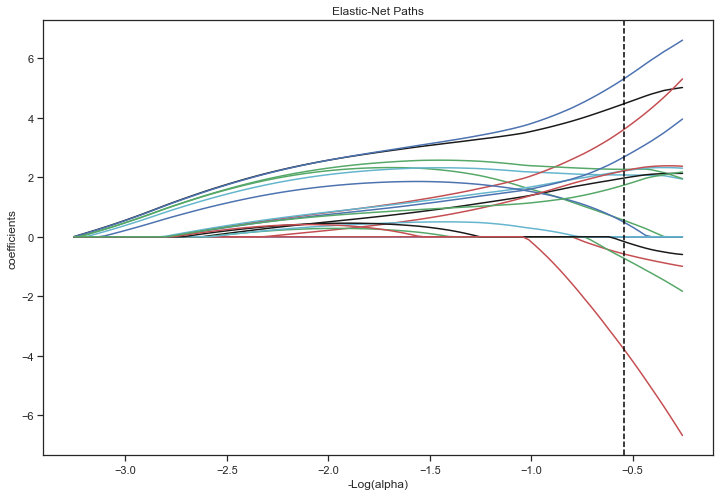

In [6]:
alphas_enet, coefs_enet, _ = fit.path(X,y)
# Plot 
plt.rcParams['figure.figsize'] = [12, 8]
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_e, c in zip(coefs_enet[0], colors):
    l2 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
plt.axvline(x = -np.log10(fit.alpha),color = 'black',linestyle = '--',label = 'alpha')
plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net Paths")
plt.axis("tight");

Regularization techniques like the lasso or ElasticNet select regression models by shrinking unimportant model coefficients to 0. The parameter alpha controls the amount of shrinkage applied to the model coefficients, and the optimal lambda was selected using leave-one-out (LOO) cross validation (CV). The dashed line in the above plot indicates the alpha value selected for this outcome (alpha values are negative log transformed here for better looking plots).

### Selected Variables

In [7]:
idx = [i - 1 for i in list(np.where(fit.coef_ != 0)[0])]
selected = [pred[i] for i in idx]
selected

['record_id',
 'hr_mri_rv_sr',
 'hr_mri_la_sr',
 'hr_mri_lv_sr',
 'a1_peak_flow_sr',
 'a1_avg_vol_sr',
 'a2_peak_flow_sr',
 'a2_avg_flow_sr',
 'rbf_avg',
 'rbf_peak',
 'rbf_peak_vein',
 'rbv_peak',
 'rbv_peak_vein']

### Final Model

## Random Forest

In [8]:
rf = RandomForestRegressor(max_features=None,max_depth=None,n_jobs=8)
rf.fit(X, y.ravel())

RandomForestRegressor(max_features=None, n_jobs=8)

In [9]:
rf

RandomForestRegressor(max_features=None, n_jobs=8)